In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import csv

In [6]:
# pd.set_option('display.max_rows', 100)
# pd.set_option('max_colwidth', 500)
# pd.set_option('display.max_columns', 500)

reviews = pd.read_csv('reviews.csv')
# reviews.head()
df_host = pd.read_csv('listings_cleaned.csv')
# df_host.head(10)

In [7]:
host_filtered = df_host.drop(df_host.iloc[:, 11:59], axis = 1)
host_filtered.head()
# reviews.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,n_bathrooms,shared_private
0,177,https://www.airbnb.com/rooms/177,20210722142814,2021-07-23,Tiny Home in the Heart of the City- ECO FRIENDLY,"160 sq ft + 80 sq ft loft for sleeping, Sleeps...","Quiet neighborhood next to park, creeks and bi...",https://a0.muscache.com/pictures/a1745ab2-b3a0...,615,https://www.airbnb.com/users/show/615,...,4.76,2016-BFN-0004968,f,2,2,0,0,1.49,1.0,private
1,360,https://www.airbnb.com/rooms/360,20210722142814,2021-07-23,Sit in the Peaceful Garden of the Chickadee Co...,Enjoy the famous Colorado weather and unplug i...,The cottage is located in the center of Lower ...,https://a0.muscache.com/pictures/monet/Select-...,666,https://www.airbnb.com/users/show/666,...,4.91,2017-BFN-0002177,f,2,2,0,0,8.98,1.0,private
2,364,https://www.airbnb.com/rooms/364,20210722142814,2021-07-23,Lodo / RiNo LOFT via airport train,"Modern 1,000 square foot loft in the heart of ...","Ten brewpubs within walking distance, two grea...",https://a0.muscache.com/pictures/11766413/a2c5...,783,https://www.airbnb.com/users/show/783,...,4.71,NaN,f,1,1,0,0,0.70,1.5,private
3,590,https://www.airbnb.com/rooms/590,20210722142814,2021-07-23,Comfortable - and a great value!,"Large guest room in my home, where I also live...",I love the diversity of my neighborhood and it...,https://a0.muscache.com/pictures/110931/30991c...,933,https://www.airbnb.com/users/show/933,...,4.84,2021-BFN-0000578,f,2,0,2,0,7.26,1.0,shared
4,592,https://www.airbnb.com/rooms/592,20210722142814,2021-07-23,private,This room is in the basement. It does not hav...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,933,https://www.airbnb.com/users/show/933,...,4.85,2021-BFN-0000578,f,2,0,2,0,1.14,1.0,shared


In [9]:
# host_filtered.drop(['scrape_id', 'last_scraped', 'name', 'description', 'neighborhood_overview', 'picture_url', 'host_id', 'host_url', 'last_review'], axis = 1, inplace = True)
host_filtered.drop(host_filtered.iloc[:, 10:], axis = 1, inplace = True)
host_filtered.head()

,id,listing_url,host_name,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,177,https://www.airbnb.com/rooms/177,Joe,4.80,4.96,4.86,4.96,4.93,4.83,4.76
1,360,https://www.airbnb.com/rooms/360,Jennifer & Giovanni,4.99,4.99,4.96,5.00,5.00,5.00,4.91
2,364,https://www.airbnb.com/rooms/364,Jason,4.85,4.78,4.81,4.95,4.96,4.65,4.71
3,590,https://www.airbnb.com/rooms/590,Jill,4.84,4.76,4.56,4.92,4.95,4.74,4.84
4,592,https://www.airbnb.com/rooms/592,Jill,4.85,4.75,4.55,4.94,4.94,4.80,4.85


In [10]:
#renaming columns for merge on ID/listng ID
reviews.drop(['reviewer_id', 'id'], axis = 1, inplace = True)
reviews.rename(columns = {'listing_id': 'id'}, inplace = True)
reviews.head()

,id,date,reviewer_name,comments
0,177,2016-09-04,Brenna,"Great place to stay! Definitely a tiny home, b..."
1,177,2016-09-13,Rachael,Joe was very friendly and gave us all the info...
2,177,2016-09-14,Haley,Amazing property and Joe was a great host! Eve...
3,177,2016-09-19,Mike,"Joe was a great host, the description of this ..."
4,177,2016-09-22,Carol,He welcomes us when we first arrived and gave ...


In [11]:
df_stars = host_filtered.drop(df_host.iloc[:, 1:2], axis = 1)
df_stars.head(10)

,id,host_name,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,177,Joe,4.80,4.96,4.86,4.96,4.93,4.83,4.76
1,360,Jennifer & Giovanni,4.99,4.99,4.96,5.00,5.00,5.00,4.91
2,364,Jason,4.85,4.78,4.81,4.95,4.96,4.65,4.71
3,590,Jill,4.84,4.76,4.56,4.92,4.95,4.74,4.84
4,592,Jill,4.85,4.75,4.55,4.94,4.94,4.80,4.85
5,686,Alexandra,4.77,4.77,4.81,4.86,4.92,4.87,4.83
6,1940,Joanne,4.93,4.93,4.93,5.00,4.97,4.92,4.88
7,31503,Rick,4.89,4.89,5.00,4.93,4.99,4.86,4.89
8,39405,Jennifer & Giovanni,4.91,4.88,4.93,4.98,4.97,4.84,4.85
9,74125,Joe,4.73,4.80,4.30,4.91,4.97,4.86,4.71


In [12]:
#plot score rating by loc
#if host has multiple listings, take average

#appending price col to host_filtered
price = df_host['price']

host_filtered = host_filtered.join(price)
host_filtered.head()


,id,listing_url,host_name,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,price
0,177,https://www.airbnb.com/rooms/177,Joe,4.80,4.96,4.86,4.96,4.93,4.83,4.76,99.0
1,360,https://www.airbnb.com/rooms/360,Jennifer & Giovanni,4.99,4.99,4.96,5.00,5.00,5.00,4.91,135.0
2,364,https://www.airbnb.com/rooms/364,Jason,4.85,4.78,4.81,4.95,4.96,4.65,4.71,179.0
3,590,https://www.airbnb.com/rooms/590,Jill,4.84,4.76,4.56,4.92,4.95,4.74,4.84,55.0
4,592,https://www.airbnb.com/rooms/592,Jill,4.85,4.75,4.55,4.94,4.94,4.80,4.85,52.0


In [47]:
df_merged = pd.merge(reviews, host_filtered, on = 'id')
#Removing review scores for this df
df_merged.drop(df_merged.iloc[:, 7:12], axis = 1, inplace = True)
df_merged.head()

,id,date,reviewer_name,comments,listing_url,host_name,review_scores_rating,review_scores_value,price
0,177,2016-09-04,Brenna,"Great place to stay! Definitely a tiny home, b...",https://www.airbnb.com/rooms/177,Joe,4.8,4.76,99.0
1,177,2016-09-13,Rachael,Joe was very friendly and gave us all the info...,https://www.airbnb.com/rooms/177,Joe,4.8,4.76,99.0
2,177,2016-09-14,Haley,Amazing property and Joe was a great host! Eve...,https://www.airbnb.com/rooms/177,Joe,4.8,4.76,99.0
3,177,2016-09-19,Mike,"Joe was a great host, the description of this ...",https://www.airbnb.com/rooms/177,Joe,4.8,4.76,99.0
4,177,2016-09-22,Carol,He welcomes us when we first arrived and gave ...,https://www.airbnb.com/rooms/177,Joe,4.8,4.76,99.0


In [49]:
#Check missing values
df_merged.drop(['review_scores_value'], axis = 1, inplace = True)
df_merged['comments'].isna().sum()

134

In [50]:
import itertools
import collections

#convert text to lowercase
def convert(lst): 
    return ([i for item in lst for i in item.lower().split()]) 

filtered_comments = convert(df_merged['comments'].fillna("")) #Fill in missing reviews with blank


In [51]:
count_word = collections.Counter(filtered_comments) #Count word frequency

clean_word_count = pd.DataFrame(count_word.most_common(5),
                             columns=['words', 'count'])

clean_word_count.head()


,words,count
0,and,427974
1,the,368712
2,to,267911
3,a,256889
4,was,231467


In [52]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /Users/yobae/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [53]:
stop_words = set(stopwords.words(['english']))
#View sample set of stopwords
list(stop_words)[0:10]

['before',
 "should've",
 'more',
 'myself',
 'themselves',
 "weren't",
 'i',
 'out',
 'himself',
 'who']

In [54]:
words_review_cleaned = [word for word in filtered_comments if word not in stop_words]
words_review_count = collections.Counter(words_review_cleaned)

word_review_count_df = pd.DataFrame(words_review_count.most_common(15),
                             columns=['words', 'count'])

In [55]:
import matplotlib.pyplot as plt

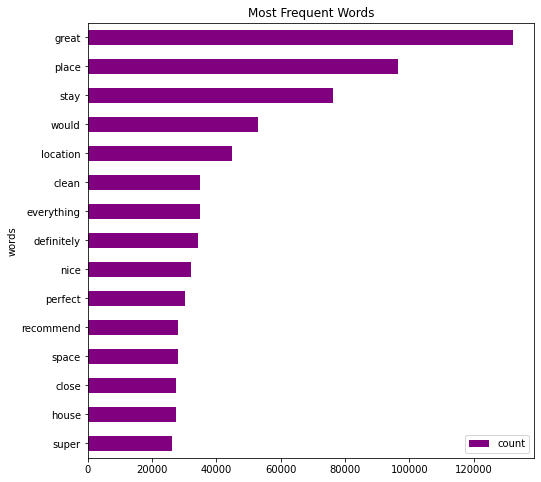

In [56]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
word_review_count_df.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Most Frequent Words")

plt.show()

In [57]:
df_merged.shape
df_sample_set = df_merged.iloc[0:100, :]
df_sample_set.head()

,id,date,reviewer_name,comments,listing_url,host_name,review_scores_rating,price
0,177,2016-09-04,Brenna,"Great place to stay! Definitely a tiny home, b...",https://www.airbnb.com/rooms/177,Joe,4.8,99.0
1,177,2016-09-13,Rachael,Joe was very friendly and gave us all the info...,https://www.airbnb.com/rooms/177,Joe,4.8,99.0
2,177,2016-09-14,Haley,Amazing property and Joe was a great host! Eve...,https://www.airbnb.com/rooms/177,Joe,4.8,99.0
3,177,2016-09-19,Mike,"Joe was a great host, the description of this ...",https://www.airbnb.com/rooms/177,Joe,4.8,99.0
4,177,2016-09-22,Carol,He welcomes us when we first arrived and gave ...,https://www.airbnb.com/rooms/177,Joe,4.8,99.0


In [58]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/yobae/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [59]:
SIA = SentimentIntensityAnalyzer()
for sentence in df_sample_set['comments'].values[:5]:
    print(sentence)
    ss = SIA.polarity_scores(sentence)
    for k in sorted(ss):
        print('{0}: {1}, '.format(k, ss[k]), end='')
    print()

Great place to stay! Definitely a tiny home, but still cozy and comfortable. Pretty fun to try it out for a couple nights for the two of us. Joe was helpful and friendly. Destinations were always less than a 20min drive and lots of parks nearby! Super fun stay :)
compound: 0.9918, neg: 0.0, neu: 0.481, pos: 0.519, 
Joe was very friendly and gave us all the information we needed. The house was exactly as described on the site. It was fun and thought provoking experiencing a 100% Eco-friendly space. We plan on staying here again next time we're in Denver!
compound: 0.7419, neg: 0.038, neu: 0.814, pos: 0.148, 
Amazing property and Joe was a great host! Even offered to walk my dog while we were out! Will definitely be back
compound: 0.9039, neg: 0.0, neu: 0.617, pos: 0.383, 
Joe was a great host, the description of this tiny house was spot on.  It was definitely a small space but well laid out and very convenient.  I would recommend a stay there.
compound: 0.8656, neg: 0.0, neu: 0.7, pos: 

positive sentiment: score >= 0.05
neutral sentiment: score > -0.05 and score < 0.05
negative sentiment: score <= -0.05

In [60]:
pscores = [SIA.polarity_scores(comments) for comments in df_sample_set['comments']]

In [61]:
from nltk.stem import PorterStemmer, WordNetLemmatizer

In [62]:
p_stemmer = PorterStemmer()
def stem(sentence):
    tokens = sentence.split()
    stemmed_tokens = [p_stemmer.stem(token) for token in tokens]
    return ' '.join(stemmed_tokens)

df_stemwords = df_sample_set[df_sample_set['comments'].notnull()]
df_stemwords['comments'] = df_stemwords['comments'].apply(stem)

In [63]:
from nltk.corpus import stopwords
pd.options.mode.chained_assignment = None
stopwords_list = set(stopwords.words("english"))
#List of punctuation to remove
#Handle html tags?
punctuations = """!()-![]{};:,+'"\,<>./?@#$%^&*_~Â""" 

def reviewParse(comments):
    #Split the review into words
    splitReview = comments.split()
    #Takes punctuation out
    parsedReview = " ".join([word.translate(str.maketrans('', '', punctuations)) + " " for word in splitReview])
    return parsedReview
  
def clean_review(comments):
    #Makes all words lowercase
    clean_words = []
    splitReview = comments.split()
    for w in splitReview:
        if w.isalpha() and w not in stopwords_list:
            clean_words.append(w.lower())
    #Joins split words back into sentence
    clean_review = " ".join(clean_words)
    return clean_review

df_clean = df_stemwords[df_stemwords['comments'].notnull()]
df_clean['comments'] = df_stemwords['comments'].apply(reviewParse).apply(clean_review)

In [64]:
# print(df_clean['comments'])
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    100 non-null    int64  
 1   date                  100 non-null    object 
 2   reviewer_name         100 non-null    object 
 3   comments              100 non-null    object 
 4   listing_url           100 non-null    object 
 5   host_name             100 non-null    object 
 6   review_scores_rating  100 non-null    float64
 7   price                 100 non-null    float64
dtypes: float64(2), int64(1), object(5)
memory usage: 7.0+ KB


In [65]:
docs = list(df_clean['comments'])

- tfidf(t, d, D) = tf(t, d) * idf(t, D)
- t = term
- d = document
- D = set of documents
- TF-IDF provides a weight
- This weight is a statistical measure used to evaluate how important 
a word is to a document in a collection or corpus. 
- The importance increases proportionally to the number of times a 
word appears in the document but is offset by the frequency of 
the word in the corpus (data-set).

In [66]:
from sklearn.feature_extraction.text import TfidfVectorizer 
 
#Settings for count vectorizer
tfidf_vectorizer=TfidfVectorizer(use_idf=True, max_features = 1000) 
 
#Send all docs here 
tfidf_vectorizer_vectors=tfidf_vectorizer.fit_transform(docs)

In [75]:
pos = [5]
neg = [1, 2]
neu = [3, 4]

def sentiment(rating):
  if rating in pos:
    return 2
  elif rating in neg:
    return 0
  else:
    return 1  

df_clean[['review_scores_rating']] = df_clean[['review_scores_rating']].apply(pd.to_numeric)
df_clean['Sentiment'] = df_clean['review_scores_rating'].apply(sentiment)
df_clean.head(-5)
# print(type(df_clean['review_scores_rating']))
# df_clean.info()

,id,date,reviewer_name,comments,listing_url,host_name,review_scores_rating,price,Sentiment
0,177,2016-09-04,Brenna,great place stay definit tini home still cozi ...,https://www.airbnb.com/rooms/177,Joe,4.80,99.0,1
1,177,2016-09-13,Rachael,joe wa veri friendli gave us inform needed hou...,https://www.airbnb.com/rooms/177,Joe,4.80,99.0,1
2,177,2016-09-14,Haley,amaz properti joe wa great host even offer wal...,https://www.airbnb.com/rooms/177,Joe,4.80,99.0,1
3,177,2016-09-19,Mike,joe wa great host descript thi tini hous wa sp...,https://www.airbnb.com/rooms/177,Joe,4.80,99.0,1
4,177,2016-09-22,Carol,welcom us first arriv gave great recommend din...,https://www.airbnb.com/rooms/177,Joe,4.80,99.0,1
...,...,...,...,...,...,...,...,...,...
90,177,2021-10-10,Dena,veri easy simpl place stay good quick trip,https://www.airbnb.com/rooms/177,Joe,4.80,99.0,1
91,177,2021-10-17,Katie,veri cute tini home heart denver great park space,https://www.airbnb.com/rooms/177,Joe,4.80,99.0,1
92,177,2021-10-24,Victoria,great tini home veri smartli organ space airbn...,https://www.airbnb.com/rooms/177,Joe,4.80,99.0,1
93,360,2018-08-13,Madeleine,thi space wa perfect great location hosts acco...,https://www.airbnb.com/rooms/360,Jennifer & Giovanni,4.99,135.0,1


In [76]:
fig = go.Figure([go.Bar(x=df.Sentiment.value_counts().index, y=df.Sentiment.value_counts().tolist())])
fig.update_layout(
    title="Values in each Sentiment",
    xaxis_title="Sentiment",
    yaxis_title="Values")
fig.show()

NameError: name 'go' is not defined

In [77]:
# tfidf_vectorizer.get_feature_names()
X = tfidf_vectorizer_vectors.toarray()
Y = df_clean['Sentiment'][:100]

Text(0, 0.5, 'frequency')

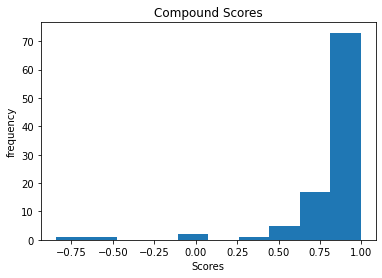

In [38]:
pd.Series([score['compound'] for score in pscores]).plot(kind = 'hist')
plt.title('Compound Scores')
plt.xlabel('Scores')
plt.ylabel('frequency')

Text(0, 0.5, 'Frequency')

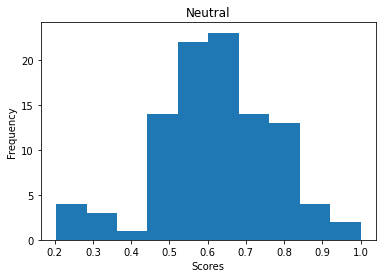

In [39]:
pd.Series([score['neu'] for score in pscores]).plot(kind='hist')
plt.title('Neutral')
plt.xlabel('Scores')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

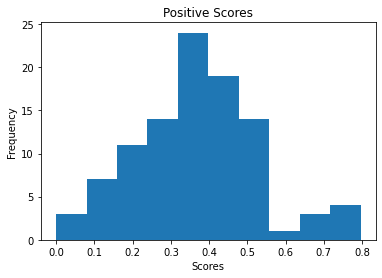

In [40]:
pd.Series([score['pos'] for score in pscores]).plot(kind='hist')
plt.title('Positive Scores')
plt.xlabel('Scores')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

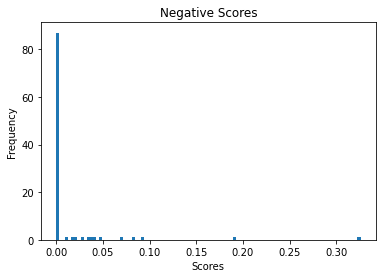

In [41]:
pd.Series([score['neg'] for score in pscores]).plot(kind='hist', bins=100)
plt.title('Negative Scores')
plt.xlabel('Scores')
plt.ylabel('Frequency')

In [42]:
scored_reviews = pd.DataFrame()
scored_reviews['review'] = [r for r in df_sample_set['comments']]
scored_reviews['compound'] = [score['compound'] for score in pscores]
scored_reviews['negativity'] = [score['neg'] for score in pscores]
scored_reviews['neutrality'] = [score['neu'] for score in pscores]
scored_reviews['positivity'] = [score['pos'] for score in pscores]